
# 🏠 House Price Prediction Project (With Linear Regression & Random Forest)

This project uses the California Housing Dataset to predict house prices using two models:
- Linear Regression (for a simple, interpretable approach)
- Random Forest (for a more accurate, non-linear model)

We will cover:
1. Data Loading and Exploration
2. Visualization
3. Model Training (Linear and Random Forest)
4. Evaluation
5. Saving the Model


In [1]:

# 📦 Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [2]:

# 🧾 Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:

# ℹ️ Understanding the data
df.info()          # Summary of data types and missing values
df.describe()      # Basic statistics like mean, std, min, max
df.isnull().sum()  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:

# 🎯 Separating input features and target
X = df.drop('MedHouseVal', axis=1)  # All columns except the target
y = df['MedHouseVal']               # The column to predict


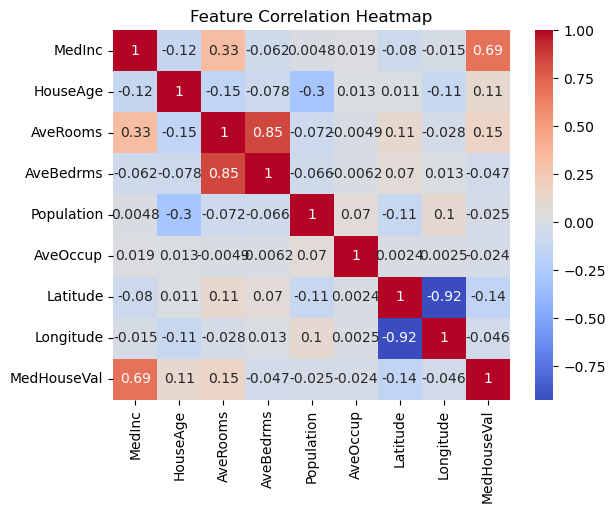

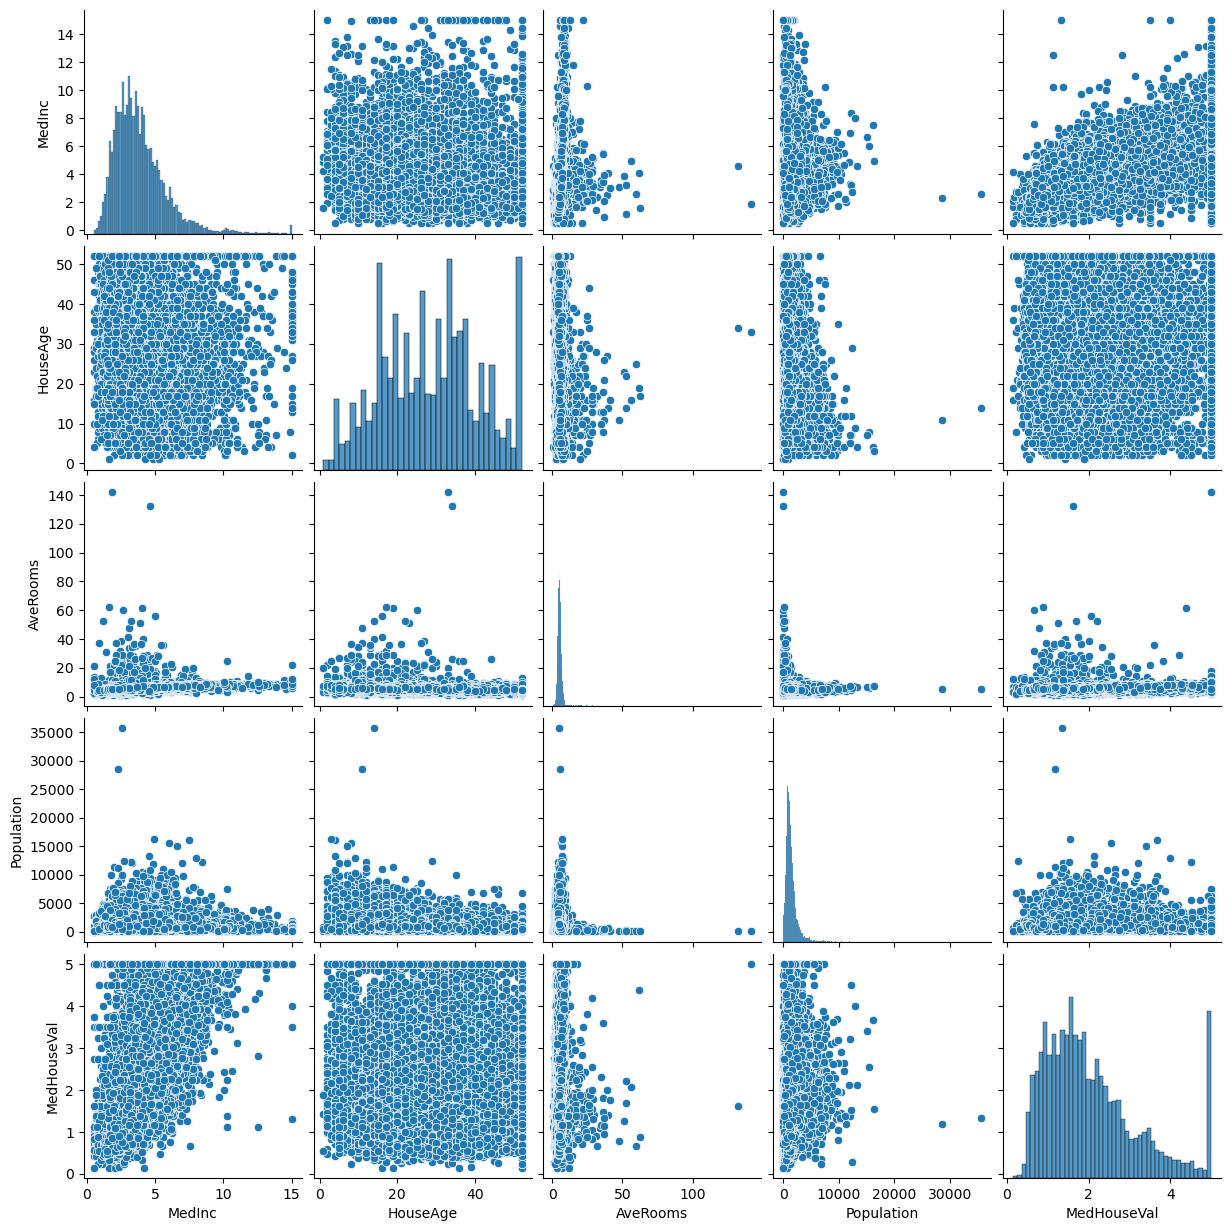

In [5]:

# 📊 Heatmap of feature correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot for important features
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'MedHouseVal']])
plt.show()


In [6]:

# ✂️ Splitting the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## 🤖 Linear Regression Model

In [7]:

# 🛠️ Training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [8]:

# 📈 Predict using Linear Regression
lr_pred = lr_model.predict(X_test)

# 📉 Evaluation metrics for Linear Regression
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R² Score:", r2_score(y_test, lr_pred))


Linear Regression:
MAE: 0.5332001304956573
MSE: 0.5558915986952441
RMSE: 0.7455813830127762
R² Score: 0.575787706032451


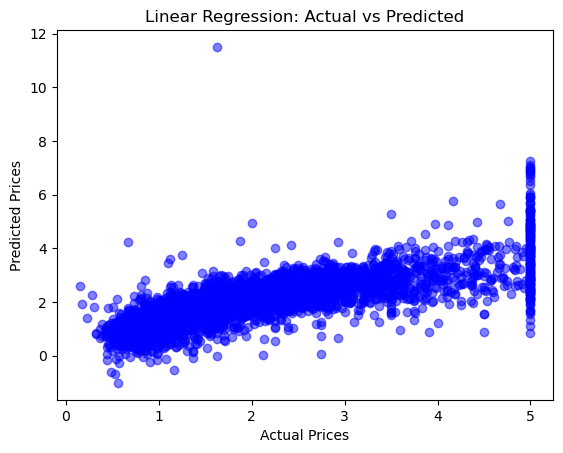

In [9]:

# 📊 Visualize predictions (Linear)
plt.scatter(y_test, lr_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


## 🌲 Random Forest Model

In [10]:

# 🛠️ Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:

# 📈 Predict using Random Forest
rf_pred = rf_model.predict(X_test)

# 📉 Evaluation metrics for Random Forest
print("Random Forest Regression:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R² Score:", r2_score(y_test, rf_pred))


Random Forest Regression:
MAE: 0.32754256845930246
MSE: 0.2553684927247781
RMSE: 0.5053399773665033
R² Score: 0.8051230593157366


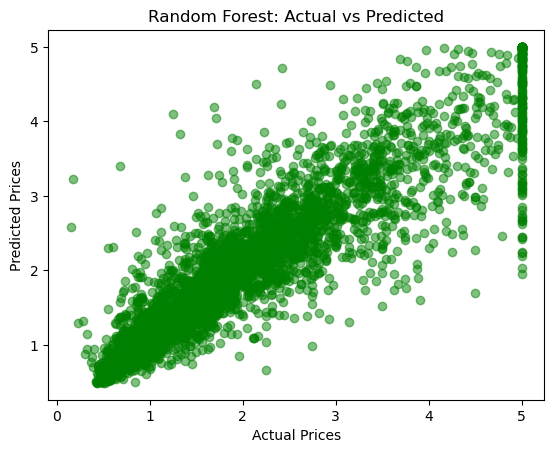

In [12]:

# 📊 Visualize predictions (Random Forest)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [13]:

# 💾 Save both models
joblib.dump(lr_model, 'linear_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']


## ✅ Conclusion

- **Linear Regression** is simple and good when data is linear, but doesn't handle complex relationships.
- **Random Forest** performs better with complex, nonlinear data and is more accurate here.
- You can use the saved models to make predictions in a web app (Streamlit/Flask) later.

🎯 Next Steps:
- Try XGBoost or GridSearchCV for tuning.
- Deploy the model using Streamlit.

Good job! 🚀
